# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
weather = pd.read_json("city-recommender/data/Seasonal_weather_data.json")

In [3]:
weather.head()

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
0,Amsterdam,85,14,7,17.0,98.0,49,13,5,15.0,...,64,21,12,13.0,203.0,60,6,1,16.0,59.0
1,Athens,37,23,16,8.0,212.0,27,20,12,9.0,...,6,31,22,2.0,347.0,51,14,8,13.0,131.0
2,Belgrade,48,18,8,7.0,153.0,60,18,8,9.0,...,69,26,16,8.0,266.0,50,5,-1,8.0,74.0
3,Berlin,44,13,6,9.0,109.0,45,13,4,9.0,...,63,23,12,10.0,219.0,45,3,-2,10.0,55.0
4,Bern,79,13,5,9.0,119.0,87,13,3,12.0,...,113,23,11,11.0,213.0,64,3,-3,10.0,64.0


In [4]:
weather.isna().sum()

city                0
autumn_prec_mm      0
autumn_high         0
autumn_low          0
autumn_prec_days    1
autumn_sun_hrs      1
spring_prec_mm      0
spring_high         0
spring_low          0
spring_prec_days    1
spring_sun_hrs      1
summer_prec_mm      0
summer_high         0
summer_low          0
summer_prec_days    1
summer_sun_hrs      1
winter_prec_mm      0
winter_high         0
winter_low          0
winter_prec_days    1
winter_sun_hrs      1
dtype: int64

In [5]:
# Dropping Monaco because it has no data
weather.loc[weather["autumn_prec_days"].isna()]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
17,Monaco,0,0,0,NaN,NaN,0,0,0,NaN,...,0,0,0,NaN,NaN,0,0,0,NaN,NaN


In [6]:
# Dropping Prague because the data is inaccurate
weather.loc[weather["city"] == "Prague"]

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
21,Prague,75,19,8,10.0,215.0,24,4,-3,6.0,...,35,11,1,7.0,153.0,40,7,0,8.0,106.0


In [7]:
weather.drop([0,17]).reset_index(drop=True).isna().sum()

city                0
autumn_prec_mm      0
autumn_high         0
autumn_low          0
autumn_prec_days    0
autumn_sun_hrs      0
spring_prec_mm      0
spring_high         0
spring_low          0
spring_prec_days    0
spring_sun_hrs      0
summer_prec_mm      0
summer_high         0
summer_low          0
summer_prec_days    0
summer_sun_hrs      0
winter_prec_mm      0
winter_high         0
winter_low          0
winter_prec_days    0
winter_sun_hrs      0
dtype: int64

In [8]:
weather = weather.drop(weather.index[[17,21]]).reset_index(drop=True)

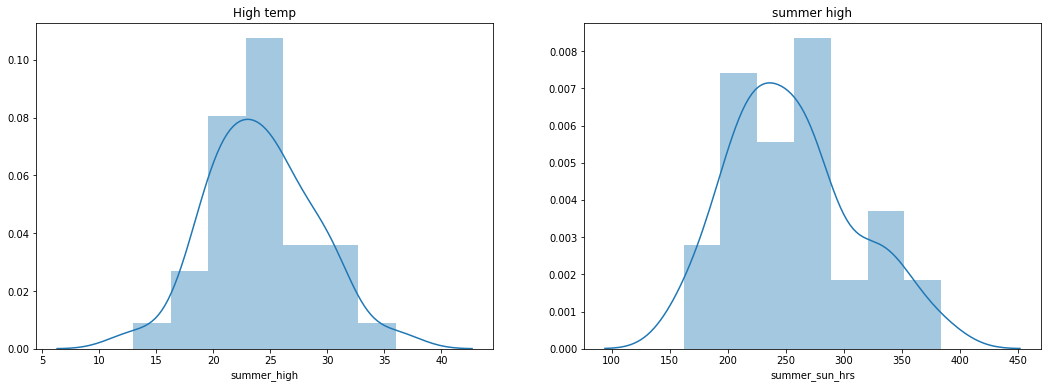

In [9]:
fig, ax = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=(18,6))

sns.distplot(weather["summer_high"], ax=ax[0]);
ax[0].set_title("High temp");

sns.distplot(weather["summer_sun_hrs"], ax=ax[1]);
ax[1].set_title("sunshine hours");

plt.title("summer high");

In [10]:
summer_high_desc = weather.sort_values("summer_high", ascending=False)

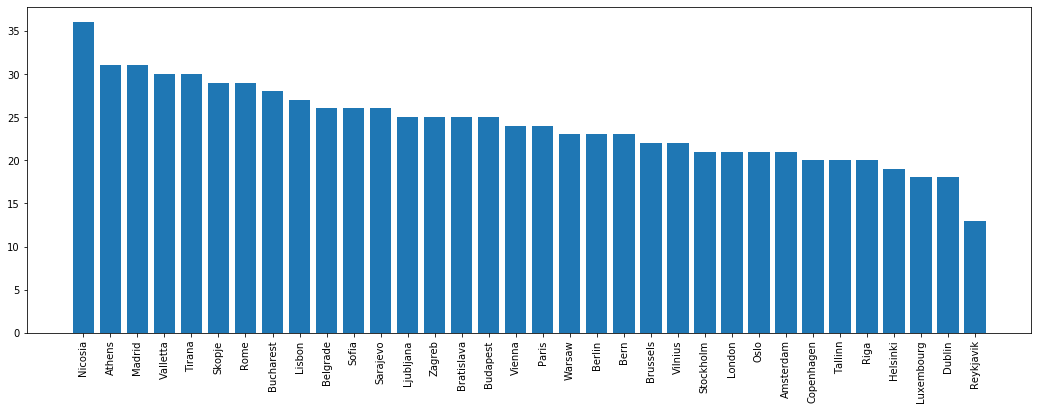

In [11]:
plt.subplots(figsize=(18,6))
plt.bar(summer_high_desc["city"], summer_high_desc["summer_high"])
plt.xticks(rotation="vertical");

# sns.barplot(x="city", y="summer_high", hue="summer_high", data=weather);

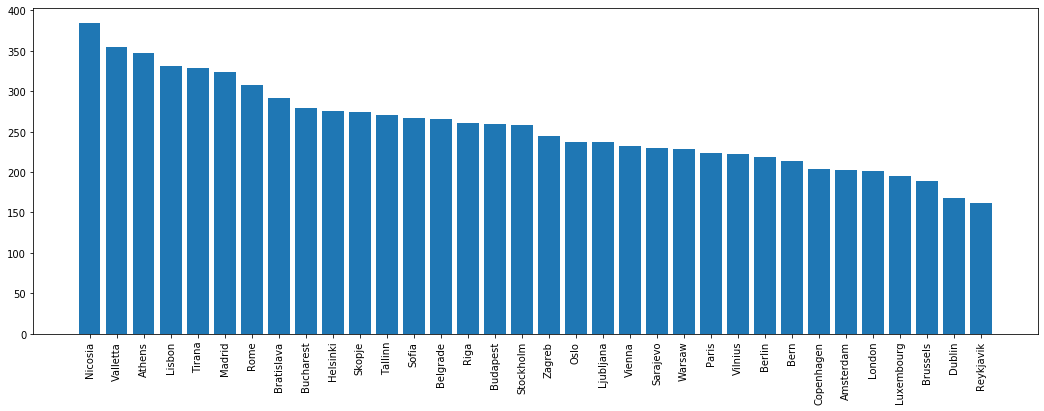

In [12]:
summer_sun_desc = weather.sort_values("summer_sun_hrs", ascending=False)

plt.subplots(figsize=(18,6))
plt.bar(summer_sun_desc["city"], summer_sun_desc["summer_sun_hrs"])
plt.xticks(rotation="vertical");


In [13]:
summer_high_desc.head()

,city,autumn_prec_mm,autumn_high,autumn_low,autumn_prec_days,autumn_sun_hrs,spring_prec_mm,spring_high,spring_low,spring_prec_days,...,summer_prec_mm,summer_high,summer_low,summer_prec_days,summer_sun_hrs,winter_prec_mm,winter_high,winter_low,winter_prec_days,winter_sun_hrs
17,Nicosia,21,28,15,4.0,273.0,29,24,11,5.0,...,5,36,21,1.0,384.0,54,16,6,11.0,187.0
1,Athens,37,23,16,8.0,212.0,27,20,12,9.0,...,6,31,22,2.0,347.0,51,14,8,13.0,131.0
16,Madrid,37,21,8,5.0,202.0,36,19,6,6.0,...,16,31,15,3.0,324.0,38,12,1,6.0,140.0
29,Valletta,70,24,17,8.0,229.0,24,20,12,6.0,...,3,30,20,1.0,355.0,87,16,10,13.0,169.0
28,Tirana,127,22,10,10.0,193.0,95,20,8,10.0,...,42,30,17,5.0,329.0,131,13,3,11.0,115.0


## 2. Kmeans Clustering

In [14]:
X = weather[["summer_sun_hrs", "summer_high"]]
clusters = KMeans(n_clusters=3)
clusters.fit(X)

KMeans(n_clusters=3)

In [15]:
clusters.predict(X)

array([1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0], dtype=int32)

In [16]:
X.assign(cluster=clusters.predict(X))

,summer_sun_hrs,summer_high,cluster
0,203.0,21,1
1,347.0,31,2
2,266.0,26,0
3,219.0,23,1
4,213.0,23,1
5,292.0,25,0
6,189.0,22,1
7,279.0,28,0
8,259.0,25,0
9,204.0,20,1


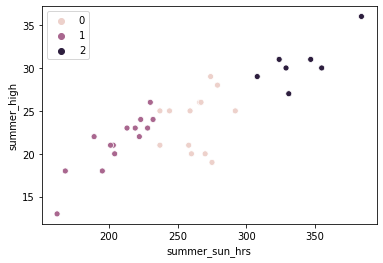

In [17]:
sns.scatterplot(data=X,
                x="summer_sun_hrs",
                y="summer_high",
                hue=clusters.predict(X));

## 3. Elbow plot - optimal no. of clusters 

In [18]:
def plot_elbow(X):
    inertias = {}
    for k in range(1,15):
        cl = KMeans(n_clusters=k).fit(X)
        inertias[k] = cl.inertia_

    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters")

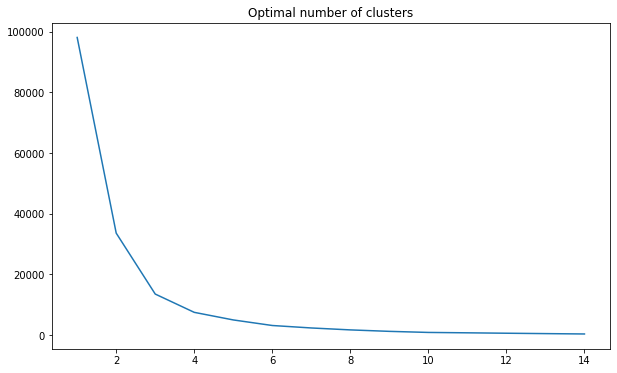

In [19]:
plot_elbow(X)

In [20]:
weather2 = weather.assign(cluster=clusters.predict(X))
weather2[["city", "cluster"]].head()

,city,cluster
0,Amsterdam,1
1,Athens,2
2,Belgrade,0
3,Berlin,1
4,Bern,1


In [21]:
cluster0 = weather2.loc[weather2["cluster"] == 0]
clu_0 = list(cluster0["city"])

In [22]:
cluster1 = weather2.loc[weather2["cluster"] == 1]
clu_1 = list(cluster1["city"])

In [23]:
cluster2 = weather2.loc[weather2["cluster"] == 2]
clu_2 = list(cluster2["city"])

These are the clusters for summer in terms of sunshine hours and high temperatures. Cities are grouped by the most similar summers.

In [24]:
print(clu_0)
print("--------------------------------------------------------------------------------------------")
print(clu_1)
print("--------------------------------------------------------------------------------------------")
print(clu_2)

['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Ljubljana', 'Oslo', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn', 'Zagreb']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Paris', 'Reykjavik', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']


## 4. Trying similar clustering for winter

In [25]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [26]:
X2 = weather[["winter_sun_hrs", "winter_high"]]
clusters = KMeans(n_clusters=4)
clusters.fit(X2)

KMeans(n_clusters=4)

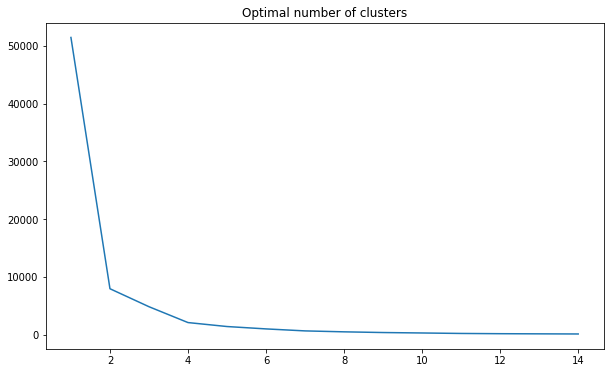

In [27]:
plot_elbow(X2)

In [28]:
clusters.predict(X2)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 0, 2, 3, 1, 3, 3,
       0, 1, 1, 1, 3, 3, 0, 2, 1, 3, 3, 1], dtype=int32)

In [29]:
weather3 = weather.assign(cluster=clusters.predict(X2))
weather3[["city", "cluster"]]

,city,cluster
0,Amsterdam,1
1,Athens,0
2,Belgrade,1
3,Berlin,1
4,Bern,1
5,Bratislava,1
6,Brussels,1
7,Bucharest,1
8,Budapest,1
9,Copenhagen,3


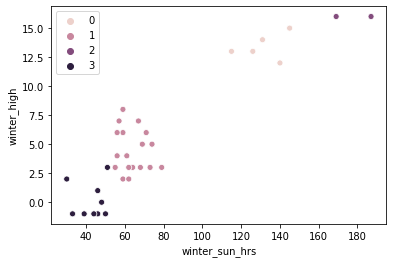

In [30]:
sns.scatterplot(data=X2,
                x="winter_sun_hrs",
                y="winter_high",
                hue=clusters.predict(X2));

In [31]:
cluster0 = weather3.loc[weather3["cluster"] == 0]
clu_0 = list(cluster0["city"])

In [32]:
cluster1 = weather3.loc[weather3["cluster"] == 1]
clu_1 = list(cluster1["city"])

In [33]:
cluster2 = weather3.loc[weather3["cluster"] == 2]
clu_2 = list(cluster2["city"])

In [34]:
cluster3 = weather3.loc[weather3["cluster"] == 3]
clu_3 = list(cluster3["city"])

In [35]:
print(clu_0)
print("--------------------------------------------------------------------------------------------")
print(clu_1)
print("--------------------------------------------------------------------------------------------")
print(clu_2)
print("--------------------------------------------------------------------------------------------")
print(clu_3)

['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']


## 5. Checking for correlations

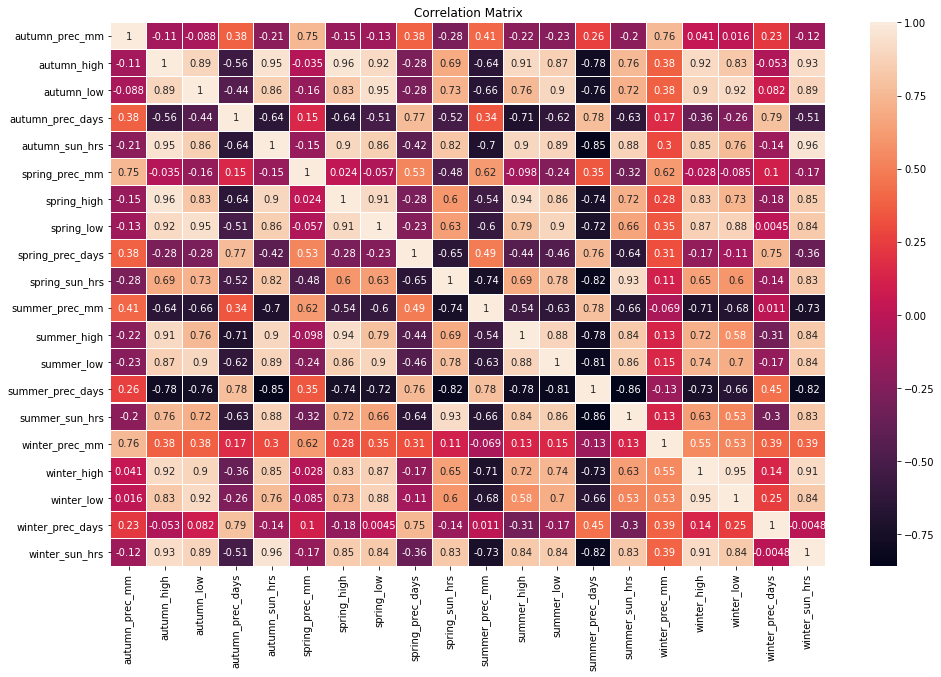

In [36]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

In [37]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [38]:
weather_subset = weather[["city", 'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs',
        'spring_high','spring_prec_days', 'spring_sun_hrs',
        'summer_high', 'summer_prec_days', 'summer_sun_hrs',
        'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

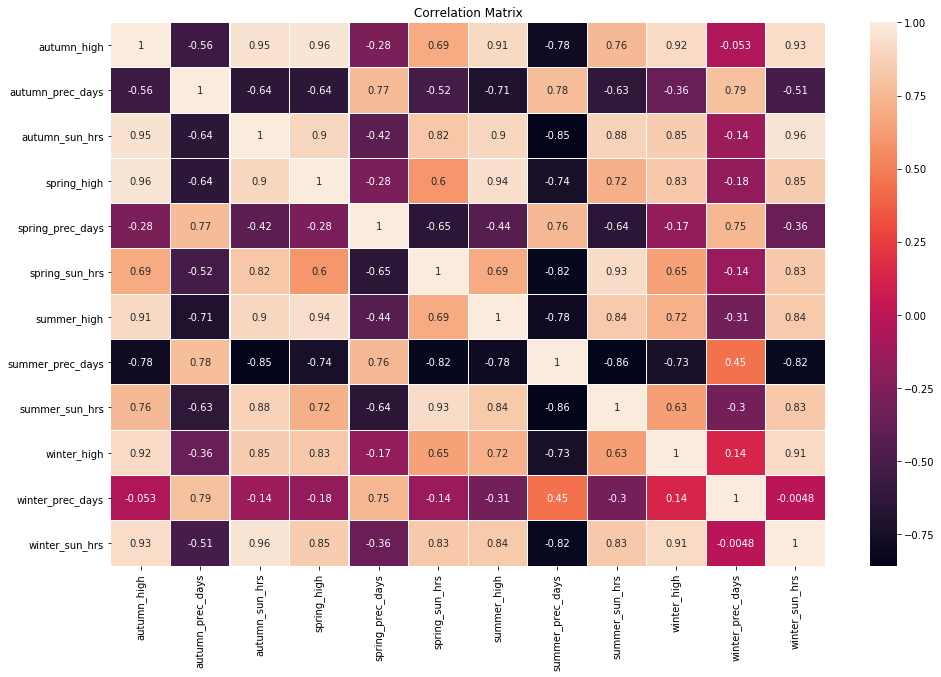

In [39]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(weather_subset.corr(),
            annot=True,
            linewidth=.1,
            vmax=1,);

ax.set_title("Correlation Matrix");

### 5.1 we have a wierd negative correlation, winter_sun_hrs and summer_prec_days, let's investigate what's happening

In [40]:
X4 = weather[["winter_sun_hrs", "summer_prec_days"]]

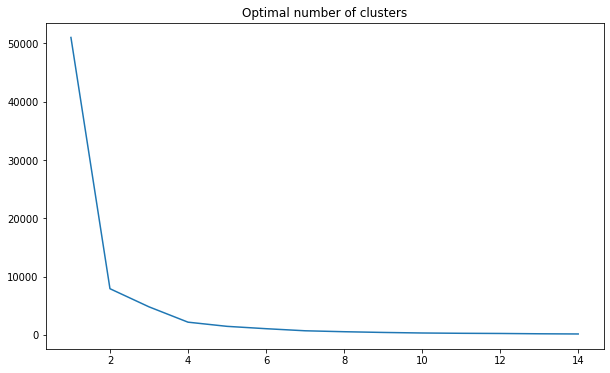

In [41]:
plot_elbow(X4)

In [42]:
def get_elbow(df, col1, col2):
    X = df[[col1, col2]]
    plot_elbow(X)

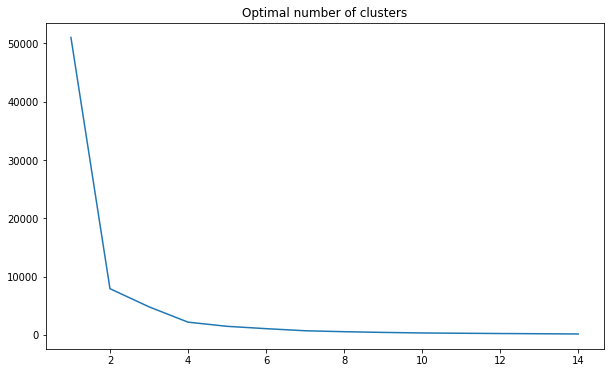

In [43]:
get_elbow(weather, "winter_sun_hrs", "summer_prec_days")

In [44]:
def check_clusters(df, col1, col2, cluster_no):
    X = df[[col1, col2]]
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2[["city", "cluster"]]
    
    sns.scatterplot(data=X,
                x=col1,
                y=col2,
                hue=clusters.predict(X));
    return df2
    
    

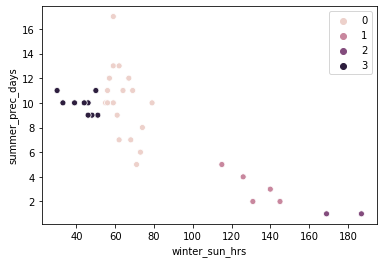

In [45]:
weather5 = check_clusters(weather, "winter_sun_hrs", "summer_prec_days", 4)

In [46]:
def get_city_list(df):
    # 1. get number of clusters
    # for loop to create lists (for i in range(0, n)), assigning unique variable names
    # 2. and then after lists are created
    # a list comprehension for each new list appending the cities in each clusters
    
    
    cluster0 = []
    cluster1 = []
    cluster2 = []
    cluster3 = []
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city"])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [47]:
get_city_list(weather5)

['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']


# 1. Possible MVP

### Write a function that takes a city name and poops out the cities that are similar.
### 1.1 Start with weather
### 1.2 find out the clustering
 - we create the feature options (ie. similar summers = sunshine_hours + high_temperatures")

### 1.3 create feature list (designed by us)
 - function: give me the city and 2 weather custom_metric, and we will give you a list of similar cities based on your input
 

# 2. Then following options
- get socio-economic features
- get venue features

#### use-case
- let's say you want to live in a safe, sunshiney city, and don't care about the money
- features = safety index (soc_ec) and sunshine_hrs (weather)

#### Key
- feature = 1 column from the data
- custom_metric = defined by us, is a combination of (2 or more) variables

In [48]:
weather.columns

Index(['city', 'autumn_prec_mm', 'autumn_high', 'autumn_low',
       'autumn_prec_days', 'autumn_sun_hrs', 'spring_prec_mm', 'spring_high',
       'spring_low', 'spring_prec_days', 'spring_sun_hrs', 'summer_prec_mm',
       'summer_high', 'summer_low', 'summer_prec_days', 'summer_sun_hrs',
       'winter_prec_mm', 'winter_high', 'winter_low', 'winter_prec_days',
       'winter_sun_hrs'],
      dtype='object')

In [49]:
def weather_rec(city, pref1, pref2):
    
    df = check_clusters(weather, pref1, pref2, 4)
    cluster = df.loc[df["city"] == city]["cluster"].item()
    
    recommendations = (df.loc[df["cluster"] == cluster])
    rec_list = list(recommendations["city"])
    
    return rec_list

['Berlin',
 'Bern',
 'Ljubljana',
 'Oslo',
 'Paris',
 'Sarajevo',
 'Vienna',
 'Vilnius',
 'Warsaw',
 'Zagreb']

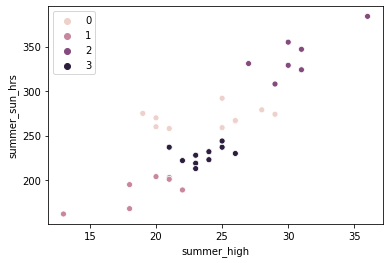

In [50]:
# cluster should be 3
weather_rec("Berlin", "summer_high", "summer_sun_hrs")

In [51]:
list(weather.columns)

['city',
 'autumn_prec_mm',
 'autumn_high',
 'autumn_low',
 'autumn_prec_days',
 'autumn_sun_hrs',
 'spring_prec_mm',
 'spring_high',
 'spring_low',
 'spring_prec_days',
 'spring_sun_hrs',
 'summer_prec_mm',
 'summer_high',
 'summer_low',
 'summer_prec_days',
 'summer_sun_hrs',
 'winter_prec_mm',
 'winter_high',
 'winter_low',
 'winter_prec_days',
 'winter_sun_hrs']

In [52]:
new_weather = weather[['city', 'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs', 
        'spring_high', 'spring_prec_days', 'spring_sun_hrs',
        'summer_high', 'summer_prec_days', 'summer_sun_hrs', 
        'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

In [53]:
test_list = weather[['city', 'autumn_high']]



In [54]:
def check_allclusters(df, col_list, cluster_no):
    X = df[col_list]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2[["city", "cluster"]]
    
    city_list = get_city_list(df2)
    
    return city_list

In [55]:
# function now outputs city list
check_allclusters(new_weather, list(new_weather.columns), 4)

['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik', 'Sarajevo']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Skopje', 'Sofia']
--------------------------------------------------------------------------------------------
['Helsinki', 'Ljubljana', 'Oslo', 'Paris', 'Riga', 'Stockholm', 'Tallinn', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']


In [57]:
# all weather data
# get_city_list(all_clusters)

#### There are variations in clusters if we subset by different categories, e.g. 'Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta' have similar winters, but ['Nicosia', 'Valletta'] have warmer, sunnier summers

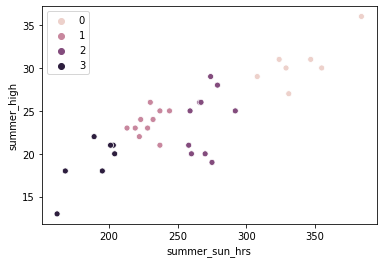

In [58]:
summer_4 = check_clusters(weather, "summer_sun_hrs", "summer_high", 4)
# get_city_list(summer_4)

In [59]:
check_allclusters(new_weather, list(new_weather[["city","summer_high"]]), 4)

['Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Budapest', 'Lisbon', 'Ljubljana', 'Paris', 'Sarajevo', 'Sofia', 'Vienna', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Bucharest', 'Madrid', 'Nicosia', 'Rome', 'Skopje', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Reykjavik']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'London', 'Luxembourg', 'Oslo', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius']


In [60]:
check_allclusters(new_weather, list(new_weather[["city","summer_sun_hrs"]]), 4)

['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn']
--------------------------------------------------------------------------------------------
['Berlin', 'Bern', 'Ljubljana', 'Oslo', 'Paris', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik']


In [61]:
check_allclusters(new_weather, list(new_weather[["city","summer_prec_days"]]), 4)

['Belgrade', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'Ljubljana', 'Oslo', 'Reykjavik', 'Riga', 'Sarajevo', 'Sofia', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'London', 'Luxembourg', 'Paris', 'Vienna']
--------------------------------------------------------------------------------------------
['Bratislava', 'Bucharest', 'Budapest', 'Rome', 'Skopje', 'Tirana']


In [62]:
def check_one_clusters(df, col, cluster_no):
    X = df[["city", col]]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster", col]]
    
    # city_list = get_city_list_one(df2)
    
    return df2

In [63]:
def get_city_list_one(df):
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city", ])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [64]:
check_one_clusters(new_weather, "summer_high", 4)

,city,cluster,summer_high
0,Amsterdam,2,21
1,Athens,1,31
2,Belgrade,0,26
3,Berlin,0,23
4,Bern,0,23
5,Bratislava,0,25
6,Brussels,2,22
7,Bucharest,1,28
8,Budapest,0,25
9,Copenhagen,2,20


In [65]:
def check_one_clusters(df, col, cluster_no):
    X = df[["city", col]]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no)
    clusters.fit(X)
    
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster", col]]
    
    # city_list = get_city_list_one(df2)
    
    return df2

In [66]:
def get_city_list_one(df):
    
    cluster0 = (df.loc[df["cluster"] == 0])
    clu_0 = list(cluster0["city", ])
    
    cluster1 = (df.loc[df["cluster"] == 1])
    clu_1 = list(cluster1["city"])
    
    cluster2 = (df.loc[df["cluster"] == 2])
    clu_2 = list(cluster2["city"])
    
    cluster3 = (df.loc[df["cluster"] == 3])
    clu_3 = list(cluster3["city"])
    
    print(clu_0)
    print("--------------------------------------------------------------------------------------------")
    print(clu_1)
    print("--------------------------------------------------------------------------------------------")
    print(clu_2)
    print("--------------------------------------------------------------------------------------------")
    print(clu_3)

In [130]:
import pprint

In [174]:
def cluster_one_list(df, col, cluster_no=4):
    X = df[["city", col]]
    X = X.drop("city", 1)
    clusters = KMeans(n_clusters=cluster_no) # train the model
    clusters.fit(X)
    clusters.predict(X)
    
    df2 = df.assign(cluster=clusters.predict(X))
    df2 = df2[["city", "cluster", col]]
    
    # create the list of custers
    cluster0 = (df2.loc[df2["cluster"] == 0])
    list1 = list(cluster0["city"])
    list2 = list(cluster0[col])
    zipped0 = dict(zip(list1, list2))
    mean0 = round(cluster0[col].mean())
    
    cluster1 = (df2.loc[df2["cluster"] == 1])
    list3 = list(cluster1["city"])
    list4 = list(cluster1[col])
    zipped1 = dict(zip(list3, list4))
    mean1 = round(cluster1[col].mean())
    
    cluster2 = (df2.loc[df2["cluster"] == 2])
    list5 = list(cluster2["city"])
    list6 = list(cluster2[col])
    zipped2 = dict(zip(list5, list6))
    mean2 = round(cluster2[col].mean())
    
    cluster3 = (df2.loc[df2["cluster"] == 3])
    list7 = list(cluster3["city"])
    list8 = list(cluster3[col])
    zipped3 = dict(zip(list7, list8))
    mean3 = round(cluster3[col].mean())
    
    #print this out
    #pprint.pprint(zipped0)
    print(zipped0)
    print(f"\nThe average {col} of this cluster is {mean0}")
    print("--------------------------------------------------------------------------------------------")
    print(zipped1)
    print(f"\nThe average {col} of this cluster is {mean1}")
    print("--------------------------------------------------------------------------------------------")
    print(zipped2)
    print(f"\nThe average {col} of this cluster is {mean2}")
    print("--------------------------------------------------------------------------------------------")
    print(zipped3)
    print(f"\nThe average {col} of this cluster is {mean3}")

In [175]:
cluster_one_list(new_weather, 'summer_high', 4)

{'Amsterdam': 21, 'Berlin': 23, 'Bern': 23, 'Brussels': 22, 'Copenhagen': 20, 'London': 21, 'Oslo': 21, 'Riga': 20, 'Stockholm': 21, 'Tallinn': 20, 'Vilnius': 22, 'Warsaw': 23}

The average summer_high of this cluster is 21.0
--------------------------------------------------------------------------------------------
{'Belgrade': 26, 'Bratislava': 25, 'Bucharest': 28, 'Budapest': 25, 'Lisbon': 27, 'Ljubljana': 25, 'Paris': 24, 'Sarajevo': 26, 'Sofia': 26, 'Vienna': 24, 'Zagreb': 25}

The average summer_high of this cluster is 26.0
--------------------------------------------------------------------------------------------
{'Athens': 31, 'Madrid': 31, 'Nicosia': 36, 'Rome': 29, 'Skopje': 29, 'Tirana': 30, 'Valletta': 30}

The average summer_high of this cluster is 31.0
--------------------------------------------------------------------------------------------
{'Dublin': 18, 'Helsinki': 19, 'Luxembourg': 18, 'Reykjavik': 13}

The average summer_high of this cluster is 17.0


In [120]:
cluster_one_list(new_weather, 'winter_high', 4)

[('Amsterdam', 6), ('Belgrade', 5), ('Brussels', 6), ('Dublin', 8), ('London', 7), ('Paris', 7), ('Sarajevo', 5), ('Skopje', 6)]

The average winter_high of this cluster is 6.0
--------------------------------------------------------------------------------------------
[('Athens', 14), ('Lisbon', 15), ('Madrid', 12), ('Nicosia', 16), ('Rome', 13), ('Tirana', 13), ('Valletta', 16)]

The average winter_high of this cluster is 14.0
--------------------------------------------------------------------------------------------
[('Helsinki', -1), ('Oslo', -1), ('Riga', -1), ('Stockholm', 0), ('Tallinn', -1), ('Vilnius', -1), ('Warsaw', 1)]

The average winter_high of this cluster is -1.0
--------------------------------------------------------------------------------------------
[('Berlin', 3), ('Bern', 3), ('Bratislava', 3), ('Bucharest', 3), ('Budapest', 3), ('Copenhagen', 3), ('Ljubljana', 4), ('Luxembourg', 2), ('Reykjavik', 2), ('Sofia', 3), ('Vienna', 2), ('Zagreb', 4)]

The average wint

In [121]:
spring = weather[['city', 'spring_high', 'spring_prec_days', 'spring_sun_hrs']]
summer = weather[['city', 'summer_high', 'summer_prec_days', 'summer_sun_hrs']]
autumn = weather[['city', 'autumn_high', 'autumn_prec_days', 'autumn_sun_hrs']]
winter = weather[['city', 'winter_high', 'winter_prec_days', 'winter_sun_hrs']]

In [123]:
check_allclusters(spring, list(spring.columns), 4)

['Belgrade', 'Bucharest', 'Budapest', 'Helsinki', 'Paris', 'Riga', 'Skopje', 'Stockholm', 'Tallinn', 'Tirana']
--------------------------------------------------------------------------------------------
['Athens', 'Bratislava', 'Lisbon', 'Madrid', 'Rome']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Oslo', 'Reykjavik', 'Sarajevo', 'Sofia', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']


In [124]:
check_allclusters(summer, list(summer.columns), 4)

['Berlin', 'Bern', 'Ljubljana', 'Oslo', 'Paris', 'Sarajevo', 'Vienna', 'Vilnius', 'Warsaw', 'Zagreb']
--------------------------------------------------------------------------------------------
['Athens', 'Lisbon', 'Madrid', 'Nicosia', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Brussels', 'Copenhagen', 'Dublin', 'London', 'Luxembourg', 'Reykjavik']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Helsinki', 'Riga', 'Skopje', 'Sofia', 'Stockholm', 'Tallinn']


In [125]:
check_allclusters(autumn, list(autumn.columns), 4)

['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana', 'Valletta']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Berlin', 'Bern', 'Brussels', 'Copenhagen', 'Dublin', 'Helsinki', 'Ljubljana', 'London', 'Luxembourg', 'Oslo', 'Paris', 'Reykjavik', 'Riga', 'Sarajevo', 'Stockholm', 'Tallinn', 'Vienna', 'Vilnius', 'Warsaw']
--------------------------------------------------------------------------------------------
['Belgrade', 'Bratislava', 'Bucharest', 'Budapest', 'Skopje', 'Sofia', 'Zagreb']
--------------------------------------------------------------------------------------------
['Nicosia']


In [126]:
check_allclusters(winter, list(winter.columns), 4)

['Athens', 'Lisbon', 'Madrid', 'Rome', 'Tirana']
--------------------------------------------------------------------------------------------
['Amsterdam', 'Belgrade', 'Berlin', 'Bern', 'Bratislava', 'Brussels', 'Bucharest', 'Budapest', 'Dublin', 'Ljubljana', 'London', 'Luxembourg', 'Paris', 'Sarajevo', 'Skopje', 'Sofia', 'Vienna', 'Zagreb']
--------------------------------------------------------------------------------------------
['Nicosia', 'Valletta']
--------------------------------------------------------------------------------------------
['Copenhagen', 'Helsinki', 'Oslo', 'Reykjavik', 'Riga', 'Stockholm', 'Tallinn', 'Vilnius', 'Warsaw']


In [109]:
#def cluster_one_list(df, col, cluster_no=4):
#    X = df[["city", col]]
#    X = X.drop("city", 1)
#    clusters = KMeans(n_clusters=cluster_no) # train the model
#    clusters.fit(X)
#    clusters.predict(X)
#    
#    df2 = df.assign(cluster=clusters.predict(X))
#    df2 = df2[["city", "cluster", col]]
#    
#    return get_mean(df2, col, cluster_no)

In [110]:
#def get_mean(df, col, cluster_no):
#    
#    cluster = (df.loc[df["cluster"] == cluster_no])
#    list1 = list(cluster["city"])
#    list2 = list(cluster[col])
#    zipped = list(zip(list1, list2))
#    mean = round(cluster[col].mean())
#    
#    print(zipped)
#    print(f"\nThe average {col} of this cluster is {mean}")
#    print("--------------------------------------------------------------------------------------------")

In [119]:
#cluster_one_list(new_weather, 'summer_high', 0)

## Socieconomic data

In [157]:
soceco = pd.read_json('city-recommender/data/Socio_economic_data.json')

In [158]:
soceco.head()

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life,climate_level,cost_of_living_level,health_care_level,pollution_level,property_income_ratio_level,purchasing_power_level,safety_level,traffic_time_level,quality_of_life_level
0,Amsterdam,87.45,84.18,69.45,30.79,10.98,81.63,67.32,29.88,168.38,Very High,Moderate,High,Low,Moderate,Moderate,High,Low,Very High
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.00,NaN,None,Moderate,High,High,Low,Moderate,Very High,Very Low,None
2,Athens,95.18,59.28,56.17,57.30,12.75,40.69,50.49,37.98,119.84,Very High,Low,Moderate,Moderate,High,Very Low,Moderate,Moderate,High
3,Belgrade,84.14,40.49,53.69,63.57,22.22,34.87,62.02,35.89,107.89,Very High,Very Low,Moderate,High,Very High,Very Low,High,Moderate,Moderate
4,Berlin,83.35,67.41,69.68,39.45,9.63,98.54,58.92,34.06,164.83,Very High,Moderate,High,Low,Moderate,High,Moderate,Low,Very High


In [159]:
soceco.columns

Index(['city', 'climate', 'cost_of_living', 'health_care', 'pollution',
       'property_income_ratio', 'purchasing_power', 'safety', 'traffic_time',
       'quality_of_life', 'climate_level', 'cost_of_living_level',
       'health_care_level', 'pollution_level', 'property_income_ratio_level',
       'purchasing_power_level', 'safety_level', 'traffic_time_level',
       'quality_of_life_level'],
      dtype='object')

In [160]:
soceco = soceco[['city', 'climate', 'cost_of_living', 'health_care', 
                 'pollution', 'property_income_ratio', 'purchasing_power', 
                 'safety', 'traffic_time', 'quality_of_life']]

In [161]:
soceco.isna().sum()

city                     0
climate                  1
cost_of_living           2
health_care              0
pollution                0
property_income_ratio    0
purchasing_power         2
safety                   0
traffic_time             0
quality_of_life          3
dtype: int64

In [162]:
soceco[soceco['climate'].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.0,NaN


In [163]:
soceco[soceco['cost_of_living'].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
20,Monaco,94.90,NaN,71.53,80.23,48.88,NaN,79.26,18.33,NaN
23,Nuuk,24.01,NaN,75.00,70.94,8.29,NaN,72.02,18.75,NaN


In [164]:
soceco[soceco['purchasing_power'].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
20,Monaco,94.90,NaN,71.53,80.23,48.88,NaN,79.26,18.33,NaN
23,Nuuk,24.01,NaN,75.00,70.94,8.29,NaN,72.02,18.75,NaN


In [165]:
soceco[soceco['quality_of_life'].isna()]

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
1,Andorra-La-Vella,NaN,66.69,69.44,64.08,7.44,82.46,87.16,5.00,NaN
20,Monaco,94.90,NaN,71.53,80.23,48.88,NaN,79.26,18.33,NaN
23,Nuuk,24.01,NaN,75.00,70.94,8.29,NaN,72.02,18.75,NaN


**Drop Andorra-La-Vella, Monaco and Nuuk because of missing data**

In [166]:
soceco.drop([1, 20, 23]).reset_index(drop=True).isna().sum()

city                     0
climate                  0
cost_of_living           0
health_care              0
pollution                0
property_income_ratio    0
purchasing_power         0
safety                   0
traffic_time             0
quality_of_life          0
dtype: int64

In [167]:
soceco = soceco.drop([1, 20, 23]).reset_index(drop=True)

In [168]:
soceco.head()

,city,climate,cost_of_living,health_care,pollution,property_income_ratio,purchasing_power,safety,traffic_time,quality_of_life
0,Amsterdam,87.45,84.18,69.45,30.79,10.98,81.63,67.32,29.88,168.38
1,Athens,95.18,59.28,56.17,57.30,12.75,40.69,50.49,37.98,119.84
2,Belgrade,84.14,40.49,53.69,63.57,22.22,34.87,62.02,35.89,107.89
3,Berlin,83.35,67.41,69.68,39.45,9.63,98.54,58.92,34.06,164.83
4,Bratislava,80.72,50.81,57.17,41.12,13.37,61.82,68.68,30.89,147.54


### Try out the function on Socioeconomic data

In [182]:
cluster_one_list(soceco, 'cost_of_living', 4)

{'Amsterdam': 84.18, 'Copenhagen': 92.92, 'Dublin': 82.5, 'London': 80.32, 'Luxembourg': 86.2, 'Oslo': 98.64, 'Paris': 89.83, 'Reykjavik': 91.58, 'Stockholm': 81.35}

The average cost_of_living of this cluster is 88.0
--------------------------------------------------------------------------------------------
{'Belgrade': 40.49, 'Bucharest': 41.44, 'Budapest': 44.0, 'Chisinau': 34.72, 'Kiev': 32.9, 'Minsk': 35.39, 'Moscow': 42.31, 'Podgorica': 41.9, 'Sarajevo': 37.81, 'Skopje': 36.73, 'Sofia': 42.79, 'Tirana': 39.7, 'Vilnius': 47.01, 'Warsaw': 44.33}

The average cost_of_living of this cluster is 40.0
--------------------------------------------------------------------------------------------
{'Berlin': 67.41, 'Brussels': 74.85, 'Helsinki': 76.76, 'Nicosia': 66.69, 'Rome': 73.95, 'Valletta': 76.54, 'Vienna': 68.72}

The average cost_of_living of this cluster is 72.0
--------------------------------------------------------------------------------------------
{'Athens': 59.28, 'Bratislav